## Time Series Analysis

###### Time Series Analysis is a sequence of data measured over regular time intervals.

In [48]:
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [36]:
df = yf.download('AAPL', start='2023-12-31', end='2024-02-01')
df.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,185.403412,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,184.015198,58414500
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.678177,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.949097,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,185.323517,59144500
2024-01-09,183.919998,185.149994,182.729996,185.139999,184.904053,42841800
2024-01-10,184.350006,186.399994,183.919998,186.190002,185.952713,46792900
2024-01-11,186.539993,187.050003,183.619995,185.589996,185.353485,49128400
2024-01-12,186.059998,186.740005,185.190002,185.919998,185.683060,40444700


In [37]:
df.index = pd.to_datetime(df.index)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-18,186.089996,189.139999,185.830002,188.630005,188.389618,78005800
2024-01-19,189.330002,191.949997,188.820007,191.559998,191.315872,68741000
2024-01-22,192.300003,195.330002,192.259995,193.889999,193.642899,60133900
2024-01-23,195.020004,195.750000,193.830002,195.179993,194.931259,42355600
2024-01-24,195.419998,196.380005,194.339996,194.500000,194.252121,53631300
2024-01-25,195.220001,196.270004,193.110001,194.169998,193.922546,54822100
2024-01-26,194.270004,194.759995,191.940002,192.419998,192.174774,44594000
2024-01-29,192.009995,192.199997,189.580002,191.729996,191.485657,47145600
2024-01-30,190.940002,191.800003,187.470001,188.039993,187.800354,55859400


In [38]:
type(df.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [39]:
# format = '%Y-%m-%d %I-%p'
df_eth = pd.read_csv('ETH_1h.csv')
print(f"{df_eth.Date[0]}: {type(df_eth.Date[0])}")
df_eth

2020-03-13 08-PM: <class 'str'>


,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
...,...,...,...,...,...,...,...
23669,2017-07-01 03-PM,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
23670,2017-07-01 02-PM,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
23671,2017-07-01 01-PM,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
23672,2017-07-01 12-PM,ETHUSD,275.01,275.01,271.00,274.83,824362.87


In [40]:
df_eth.Date = pd.to_datetime(df_eth.Date, format='%Y-%m-%d %I-%p')
df_eth.head(10)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
5,2020-03-13 15:00:00,ETHUSD,128.39,128.90,116.06,124.85,7378976.00
6,2020-03-13 14:00:00,ETHUSD,134.03,137.90,125.50,128.39,3733916.89
7,2020-03-13 13:00:00,ETHUSD,131.35,140.95,128.99,134.03,9582732.93
8,2020-03-13 12:00:00,ETHUSD,128.93,134.60,126.95,131.35,3906590.52
9,2020-03-13 11:00:00,ETHUSD,132.60,133.17,126.01,128.93,3311080.29


In [41]:
start_date = df.index.min()
end_date = df.index.max()
time_period = end_date - start_date
print(f"Start: {start_date},\nEnd: {end_date},\nSpan: {time_period}")

Start: 2024-01-02 00:00:00,
End: 2024-01-31 00:00:00,
Span: 29 days 00:00:00


In [42]:
df.loc['2024-01-08']

Open         1.820900e+02
High         1.856000e+02
Low          1.815000e+02
Close        1.855600e+02
Adj Close    1.853235e+02
Volume       5.914450e+07
Name: 2024-01-08 00:00:00, dtype: float64

In [43]:
df.loc['2024-01-08':'2024-01-16']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-08,182.089996,185.600006,181.500000,185.559998,185.323517,59144500
2024-01-09,183.919998,185.149994,182.729996,185.139999,184.904053,42841800
2024-01-10,184.350006,186.399994,183.919998,186.190002,185.952713,46792900
2024-01-11,186.539993,187.050003,183.619995,185.589996,185.353485,49128400
2024-01-12,186.059998,186.740005,185.190002,185.919998,185.683060,40444700
2024-01-16,182.160004,184.259995,180.929993,183.630005,183.395981,65603000


In [44]:
df.iloc[:8, 1:4]

,High,Low,Close
Date,,,
2024-01-02,188.440002,183.889999,185.639999
2024-01-03,185.880005,183.429993,184.250000
2024-01-04,183.089996,180.880005,181.910004
2024-01-05,182.759995,180.169998,181.179993
2024-01-08,185.600006,181.500000,185.559998
2024-01-09,185.149994,182.729996,185.139999
2024-01-10,186.399994,183.919998,186.190002
2024-01-11,187.050003,183.619995,185.589996


In [45]:
# Visualizing a time series
df_aapl = yf.download('AAPL', start='2020-12-31', end='2024-03-23')
df_aapl.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,134.080002,134.740005,131.720001,132.690002,130.221085,99116600
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.002098,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,128.572342,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.244377,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,128.483978,109578200


(array([18628., 18748., 18871., 18993., 19113., 19236., 19358., 19478.,
        19601., 19723., 19844.]),
 [Text(18628.0, 0, '2021'),
  Text(18748.0, 0, '2021'),
  Text(18871.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19113.0, 0, '2022'),
  Text(19236.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19478.0, 0, '2023'),
  Text(19601.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(19844.0, 0, '2024')])

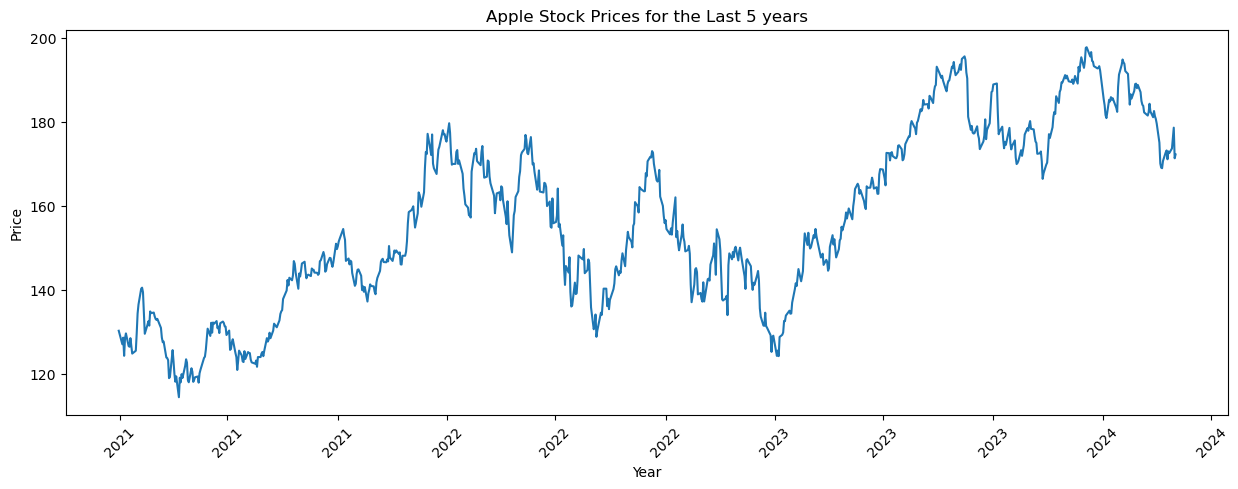

In [56]:
df_aapl.index = pd.to_datetime(df_aapl.index)
plt.figure(figsize=(15, 5))
plt.title('Apple Stock Prices for the Last 5 years')
plt.xlabel('Year')
plt.ylabel('Price')
plt.plot(df_aapl['Adj Close'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

In [58]:
df_aapl_2023 = df_aapl.loc['2023']
df_aapl_2023

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,130.279999,130.899994,124.169998,125.070000,124.216293,112117500
2023-01-04,126.889999,128.660004,125.080002,126.360001,125.497498,89113600
2023-01-05,127.129997,127.769997,124.760002,125.019997,124.166641,80962700
2023-01-06,126.010002,130.289993,124.889999,129.619995,128.735245,87754700
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.261612,70790800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700


(array([19358., 19417., 19478., 19539., 19601., 19662., 19723.]),
 [Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07'),
  Text(19601.0, 0, '2023-09'),
  Text(19662.0, 0, '2023-11'),
  Text(19723.0, 0, '2024-01')])

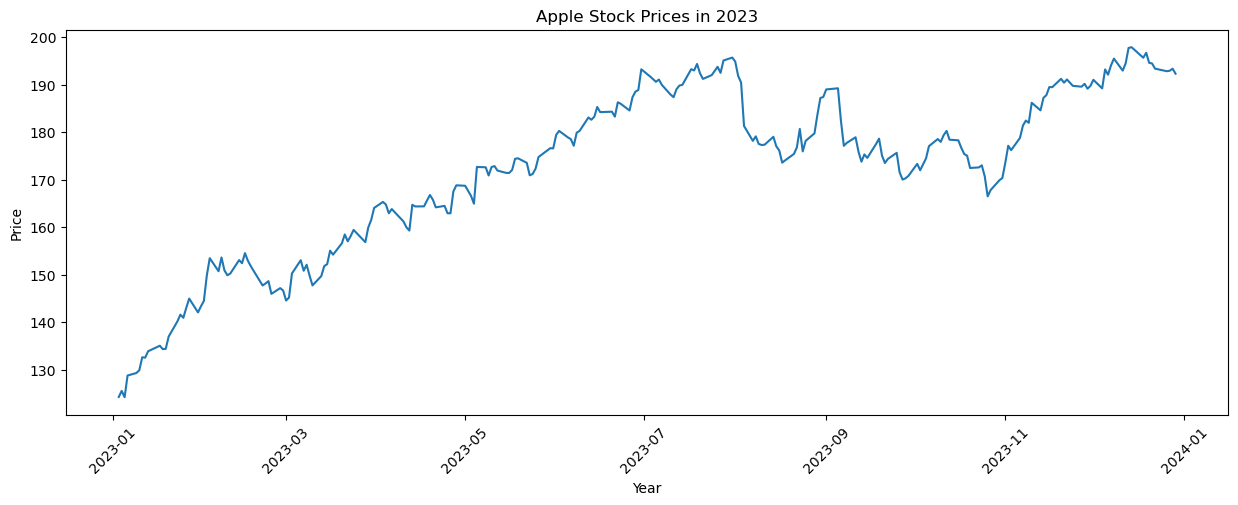

In [64]:
plt.figure(figsize=(15, 5))
plt.title('Apple Stock Prices in 2023')
plt.xlabel('Year')
plt.ylabel('Price')
plt.plot(df_aapl_2023['Adj Close'])
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m'))
plt.xticks(rotation=45)